<a href="https://colab.research.google.com/github/AsmaeEl23/Numpy-Tricks/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt


In [ ]:
dataset=pnd.read_csv('StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


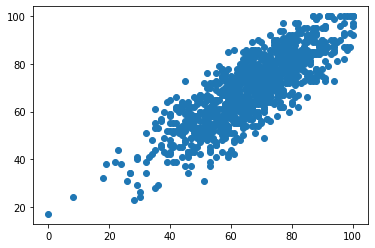

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]
 number of lines  1000  number of columns  3


In [ ]:

data=dataset.iloc[:,[5,6,7]].values
plt.scatter(data[:,0],data[:,1])
plt.show()
print(data)
print(" number of lines ",data.shape[0]," number of columns ",data.shape[1])

In [ ]:

def kmeans(data,n_clusters):

  #l is number of lines and c is number of columns
  l=data.shape[0]
  c=data.shape[1]
  #now we will split data to n_clusters groups and then
  #we will calculate center of each group to initialize centers
  groups=np.array_split(data,n_clusters)
  #initialize centers the mean of rows of each group
  centers=[]
  for i in range(n_clusters) :
    centers.append(groups[i].mean(axis=0))
  #create a list of l closests
  closest=np.zeros(l)

  while True :

    old_closest=closest.copy()

    #distance between all points and the n_clusters centers
    distances = np.zeros((l,n_clusters))
    for i in range(n_clusters):
        distances[:,i] = ((data-centers[i])**2).sum(axis=1)

    #the indix of the min distance - which center is near of the point
    closest = np.argmin(distances,axis=1)
    #update centers
    for i in range(n_clusters):
        centers[i] = data[closest == i].mean(axis=0)
    #the end of clustering
    if all(old_closest==closest) :
      break
  for i in range(n_clusters):
    groups[i]=[]
  for i,c in enumerate(closest) :
   groups[c].append(tuple(data[i]))


  return closest,centers,groups



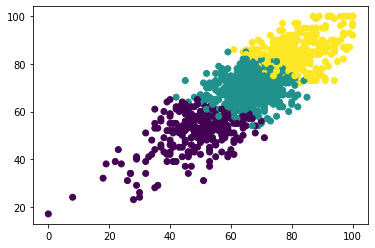

In [ ]:
data=dataset.iloc[:,[5,6,7]].values
closest,centers,groups=kmeans(data,3)
plt.scatter(data[:,0],data[:,1],c=closest)
plt.show()